In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
# perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
perfomances_dt4[perfomances_dt4['policy_name'] == 'ratio']


,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.000000,-8.9,5.0,ratio,-1.100434,-1.100434,0.993133,1.100434
1,ratio_6,dynamic,12669.298020,38.258298,166.480672,1633.857958,23.307294,-12.4,6.0,ratio,-3.439280,-26.746574,0.989449,3.439280
2,ratio_7,dynamic,12614.408659,36.911936,160.901631,1608.333614,45.052457,-15.5,7.0,ratio,-7.218462,-52.270918,0.985162,7.218462
3,ratio_8,dynamic,12561.314479,35.871759,156.325988,1583.498920,65.656915,-17.9,8.0,ratio,-11.448697,-77.105612,0.981015,11.448697
4,ratio_9,dynamic,12499.298894,34.846755,151.565652,1558.929124,84.876765,-20.3,9.0,ratio,-16.798643,-101.675408,0.976172,16.798643
5,ratio_10,dynamic,12462.486580,34.237934,148.792065,1536.439230,104.154445,-21.6,10.0,ratio,-20.010856,-124.165302,0.973297,20.010856
6,ratio_11,dynamic,12398.023165,33.455608,144.743967,1512.817535,121.584932,-23.4,11.0,ratio,-26.202066,-147.786998,0.968263,26.202066
7,ratio_12,dynamic,12343.021361,32.896622,141.574331,1490.178115,138.742844,-24.7,12.0,ratio,-31.683573,-170.426417,0.963967,31.683573
8,ratio_13,dynamic,12279.855826,32.326320,138.220909,1467.617762,154.807418,-26.0,13.0,ratio,-38.179353,-192.986770,0.959034,38.179353
9,ratio_14,dynamic,12212.814136,31.789123,134.940242,1445.311106,170.024704,-27.3,14.0,ratio,-45.268722,-215.293427,0.953798,45.268722


In [3]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'static')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'static')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'cut') & (perfomances_dt4['NMS'] == 'static')]
# nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'static')]
# target_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'static')]
# shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'static')]
bal_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'bal') & (perfomances_dt4['NMS'] == 'static')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'dynamic')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'dynamic')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'cut') & (perfomances_dt4['NMS'] == 'dynamic')]
bal_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'bal') & (perfomances_dt4['NMS'] == 'dynamic')]
# nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'dynamic1')]
# target_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'dynamic1')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == 'dynamic1')]
#shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'dynamic1')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
nred_2_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
10,cut_0,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.0,8.9,0.0,cut,-1.100434,-1.100434,0.993133,1.100434
11,cut_1,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.0,8.9,1.0,cut,-1.100434,-1.100434,0.993133,1.100434
12,cut_2,dynamic,12716.475601,39.817473,172.574416,1659.504493,0.0,8.9,2.0,cut,-1.100039,-1.100039,0.993133,1.100039
13,cut_3,dynamic,12661.938500,38.053237,165.838083,1656.584732,0.0,12.9,3.0,cut,-4.019800,-4.019800,0.988874,4.019800
14,cut_4,dynamic,12631.879640,37.469927,163.141131,1654.264358,0.0,14.3,4.0,cut,-6.340174,-6.340174,0.986526,6.340174
15,cut_5,dynamic,12626.527256,37.386747,162.685581,1653.833909,0.0,14.4,5.0,cut,-6.770623,-6.770623,0.986108,6.770623
16,cut_6,dynamic,12624.634123,37.375419,162.585102,1653.639206,0.0,14.5,6.0,cut,-6.965326,-6.965326,0.985961,6.965326
17,cut_7,dynamic,12623.982693,37.325334,162.434498,1653.653429,0.0,14.6,7.0,cut,-6.951104,-6.951104,0.985910,6.951104
18,cut_8,dynamic,12588.190358,36.442972,159.019289,1651.033148,0.0,16.6,8.0,cut,-9.571384,-9.571384,0.983114,9.571384
19,cut_9,dynamic,12543.893424,35.794302,155.838083,1647.058421,0.0,18.1,9.0,cut,-13.546111,-13.546111,0.979655,13.546111


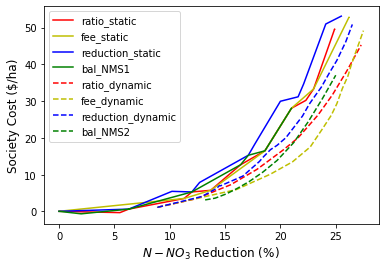

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_static')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'y', label = 'fee_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'reduction_static')
ax.plot(bal_1_dt['L_change'], bal_1_dt['C'], color = 'g', label = 'bal_NMS1')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'y', label = 'fee_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'reduction_dynamic')
ax.plot(bal_2_dt['L_change'], bal_2_dt['C'], linestyle='dashed', color = 'g', label = 'bal_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Society Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/net_balance.pdf"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/net_balance.png"
plt.savefig(plot_file_name, dpi=300)